###         <font color='#00FFFF'>*Life Expectancy Prediction with Linear Regression model*</font> 

### TASK 1:
#### *UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE*

![title](img/lifeexp.jpeg)

### TASK 2: 
#### *IMPORT DATASETS AND LIBRARIES*

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [49]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 

In [50]:
# read the csv file 
life_expectancy_df = pd.read_csv('Life_Expectancy_Data.csv')

In [4]:
life_expectancy_df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
life_expectancy_df.head(7)


,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9


In [6]:
life_expectancy_df.tail(7)

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2931,2006,Developing,45.4,7.0,28,4.57,34.262169,68.0,212,27.9,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5
2932,2005,Developing,44.6,717.0,28,4.14,8.717409,65.0,420,27.5,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,2000,Developing,46.0,665.0,24,1.68,0.000000,79.0,1483,25.5,...,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


### TASK 3: 
#### *PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION*

<AxesSubplot: >

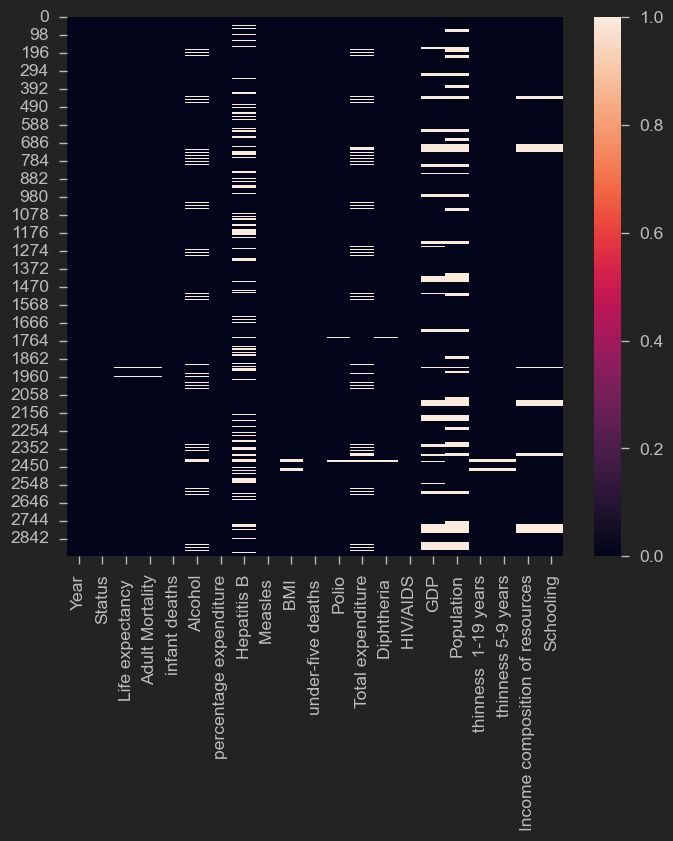

In [7]:
sns.heatmap(life_expectancy_df.isnull())

 <font color=#FF0000>It looks like we have a lot of missing values so we want to get rid of all these missing values!</font>

In [8]:
# Check the dataframe info
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [13]:
# Statistical summary of the dataframe
life_expectancy_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


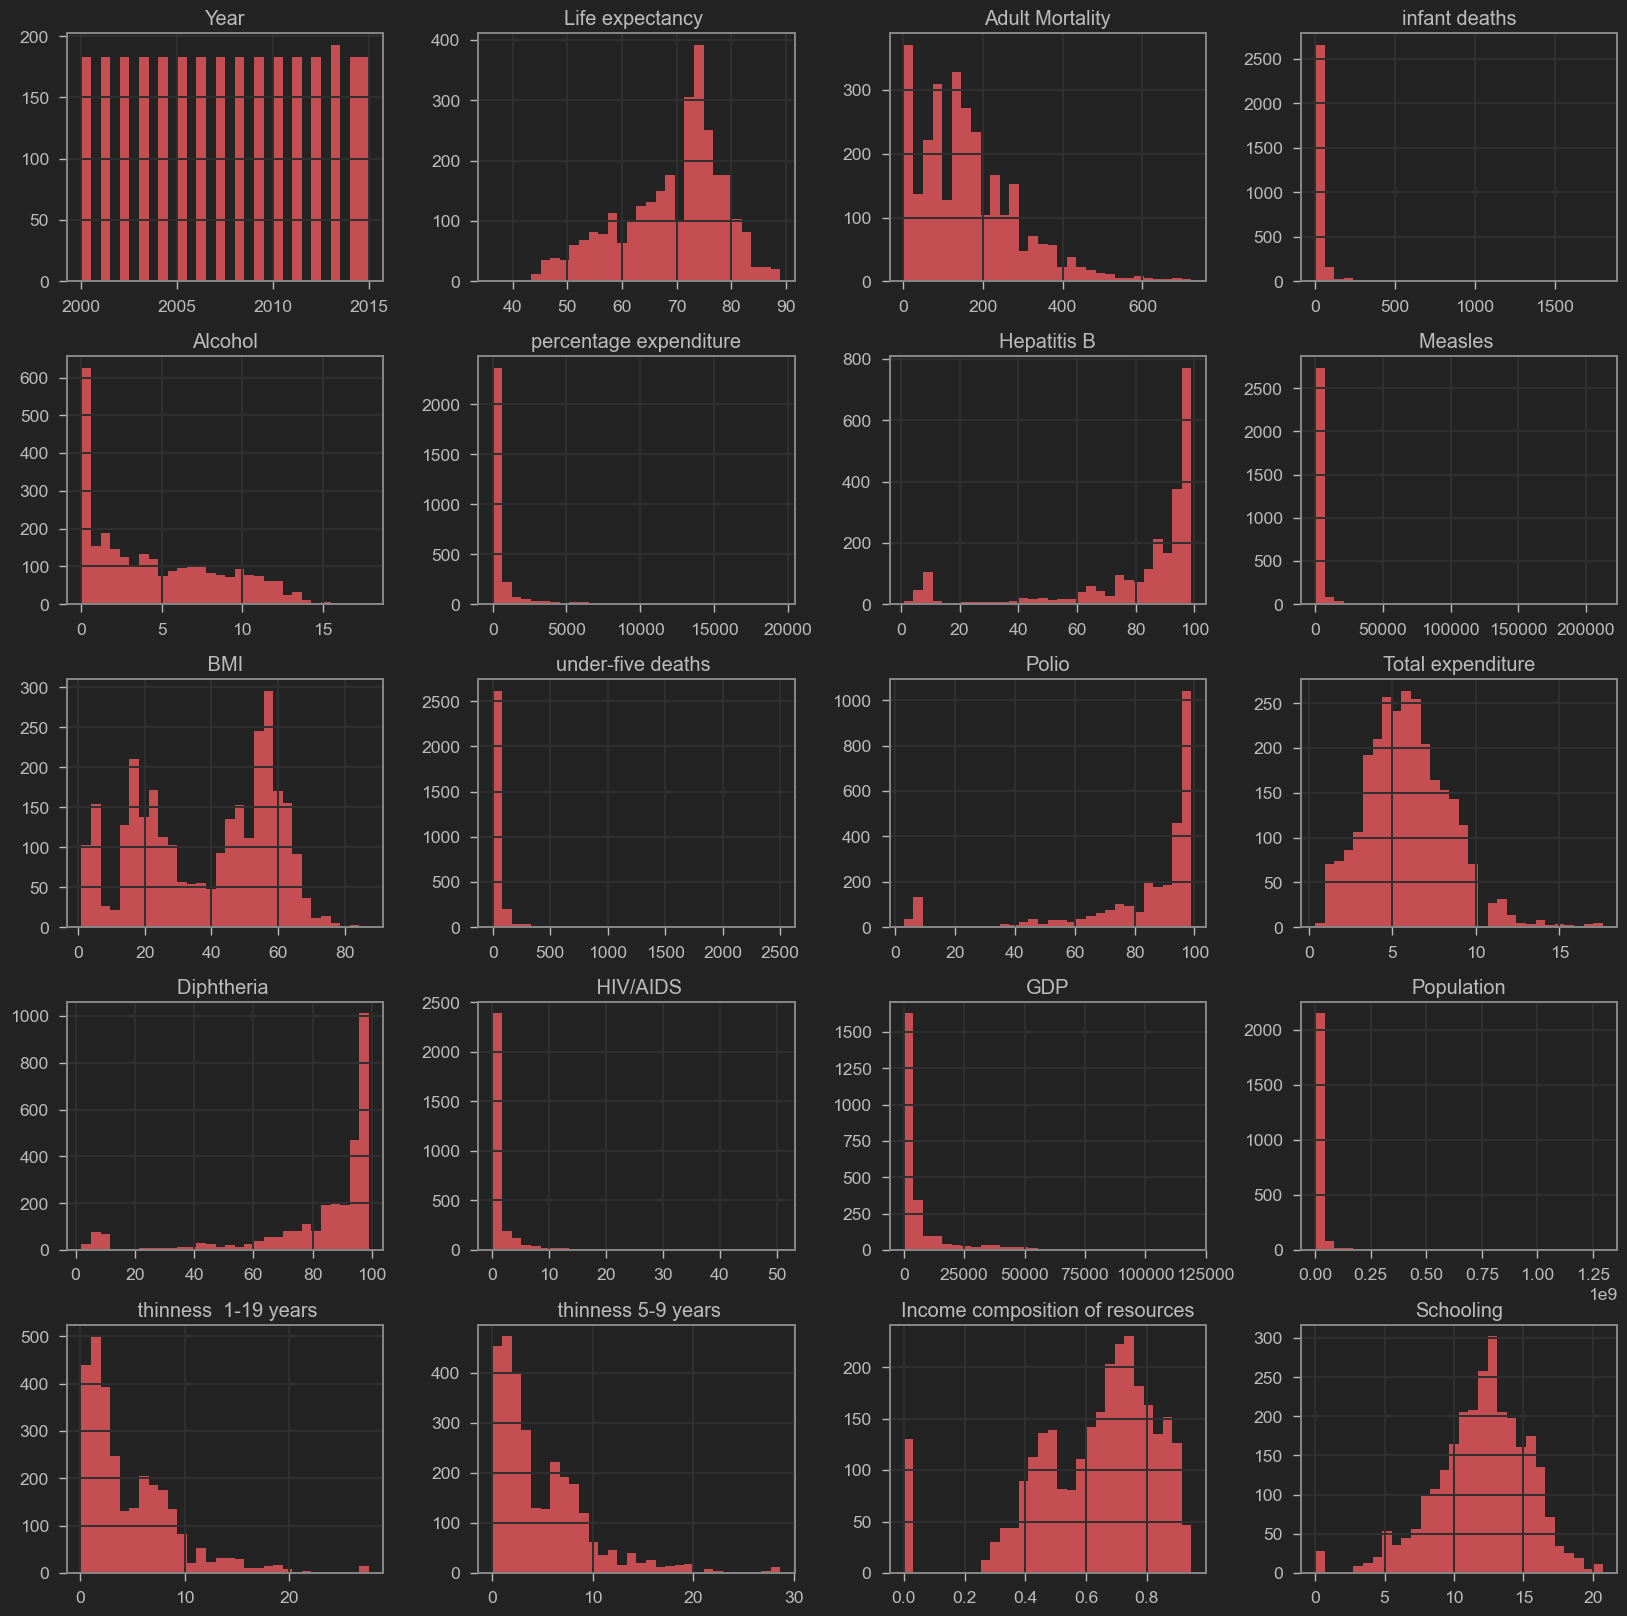

In [9]:
# Plot the histograms for all categories
life_expectancy_df.hist(bins=30,figsize=(20,20),color='r')
plt.show()

In [ ]:
# # Plot pair plots
# plt.figure(figsize=(20,20))
# sns.pairplot(life_expectancy_df)

C:\Users\soumy\AppData\Local\Temp\ipykernel_31220\1096359808.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = life_expectancy_df.corr()


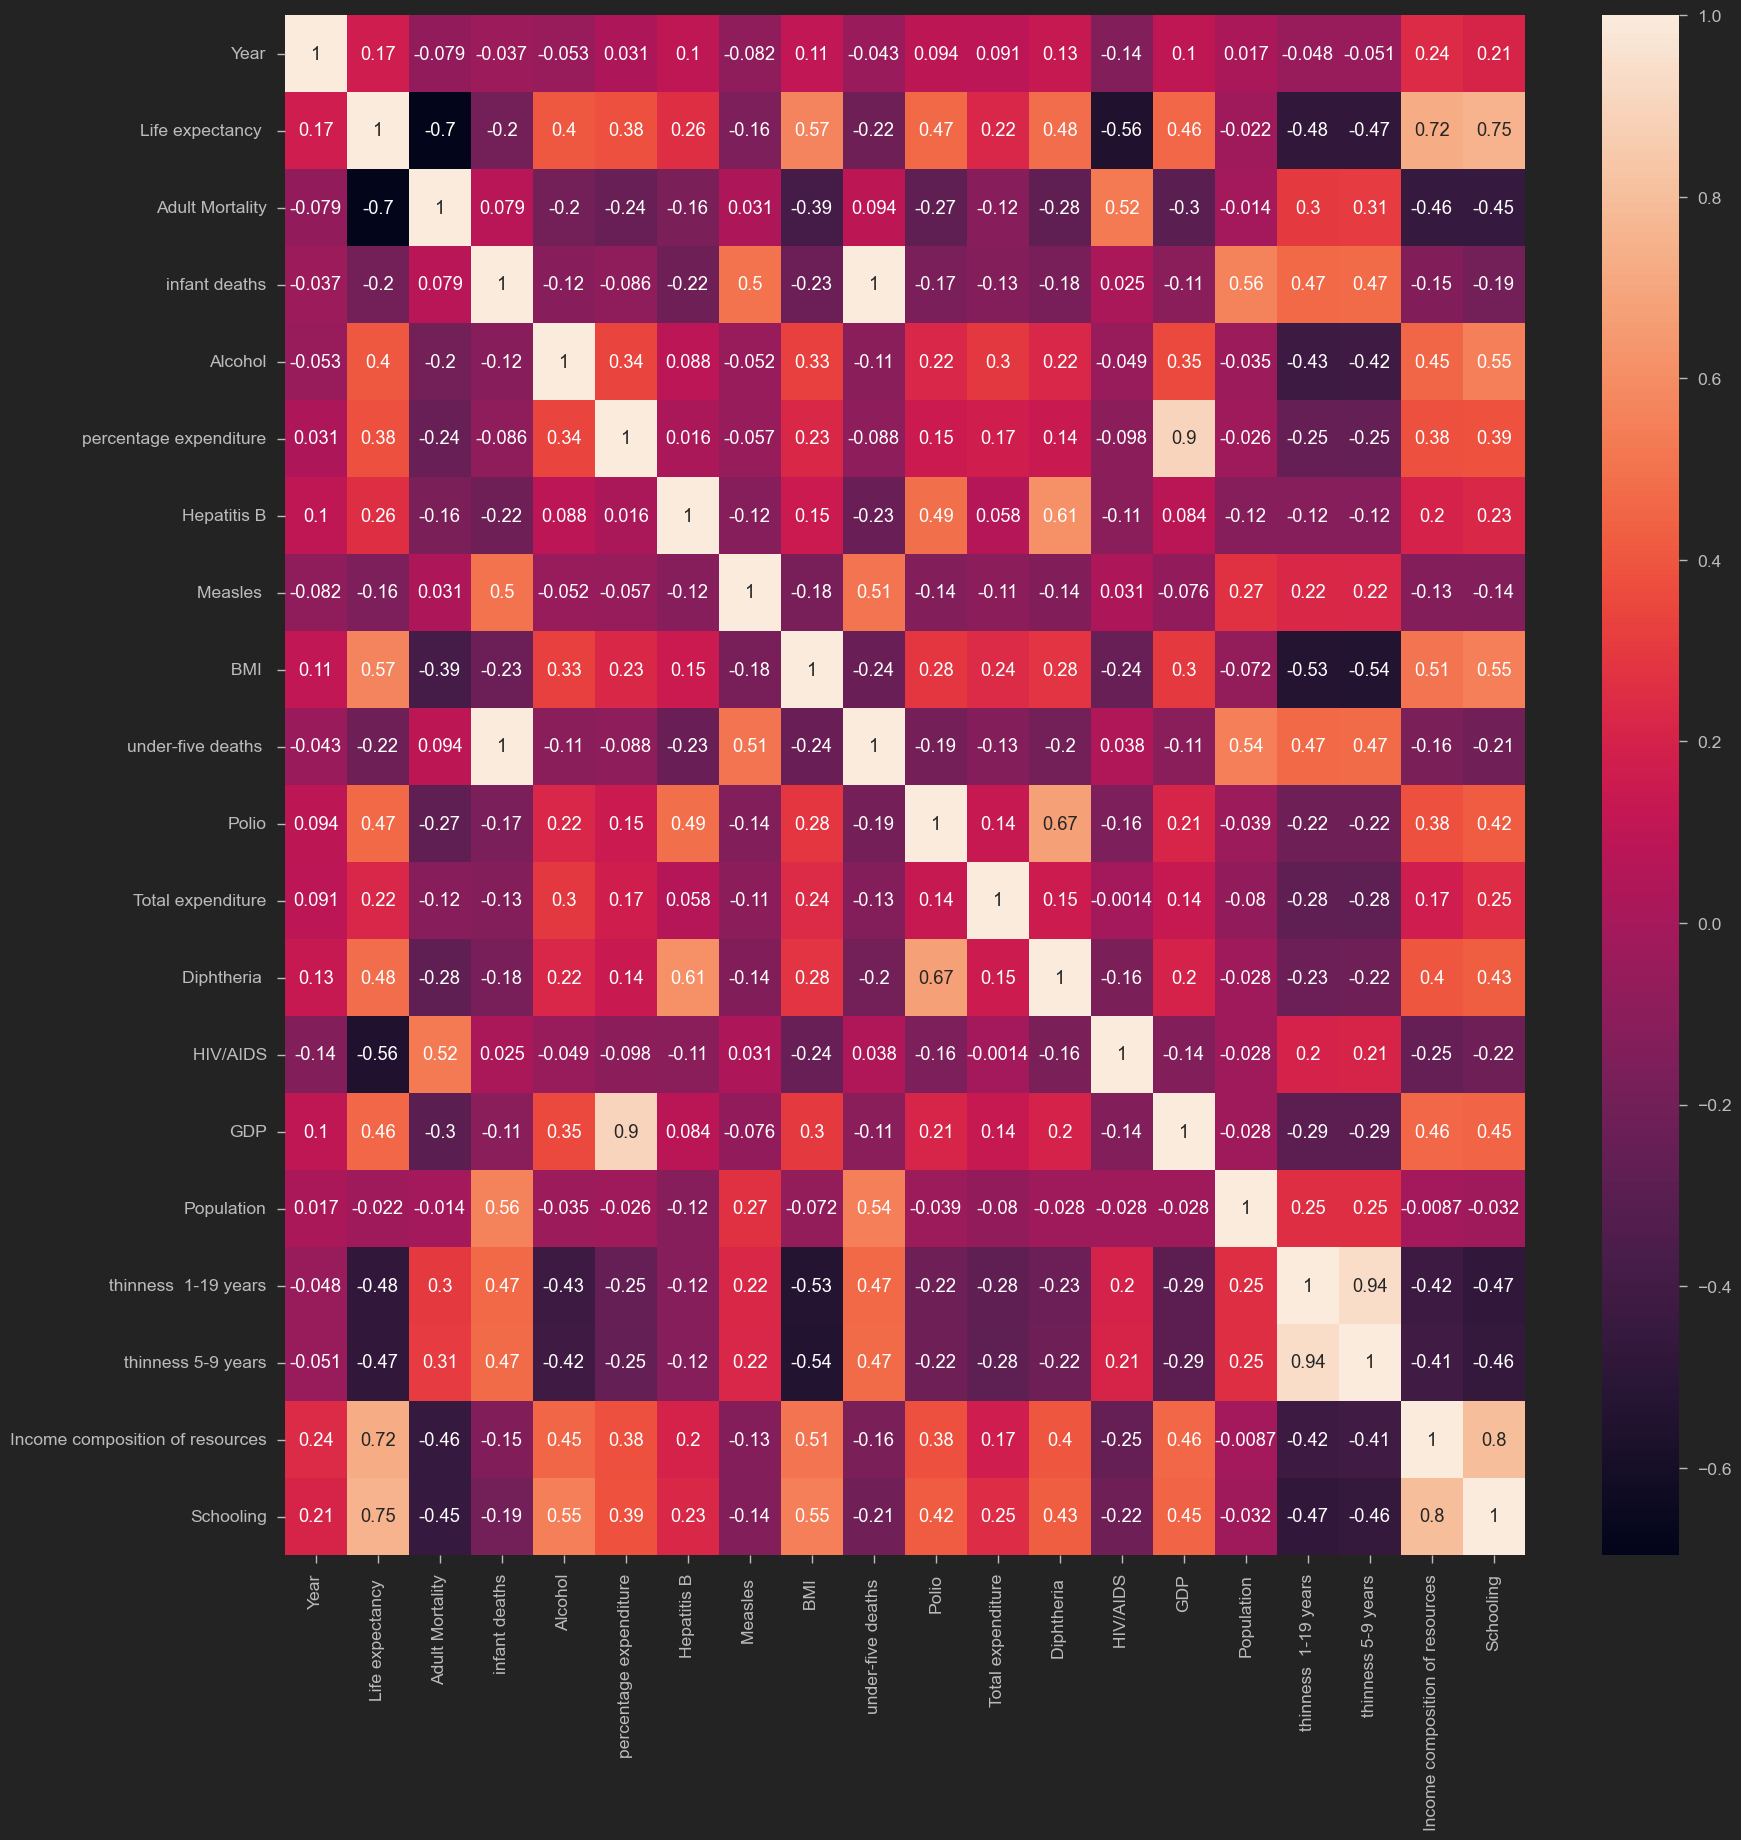

In [18]:
# Plot the correlation matrix
plt.figure(figsize=(20,20))
corr_matrix = life_expectancy_df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

<div class="alert alert-success">Here we can see Life expectancy having positive correlation with the following categories: </br>
&#10148; BMI - 0.57</br>
&#10148; Schooling - 0.75</br>
&#10148; Income composition of resorces - 0.74</br>
&#10148; GDP - 0.46</br>
</div>


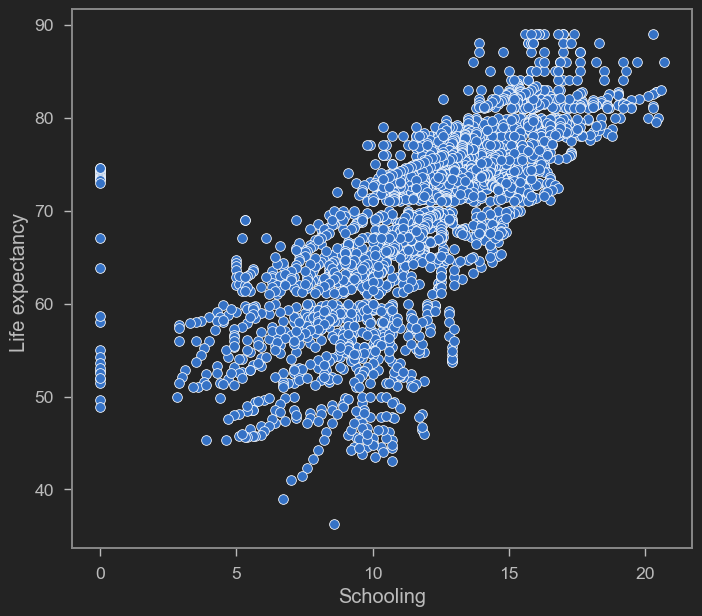

In [10]:
sns.scatterplot(data = life_expectancy_df, x = 'Schooling', y = 'Life expectancy ')
plt.show()

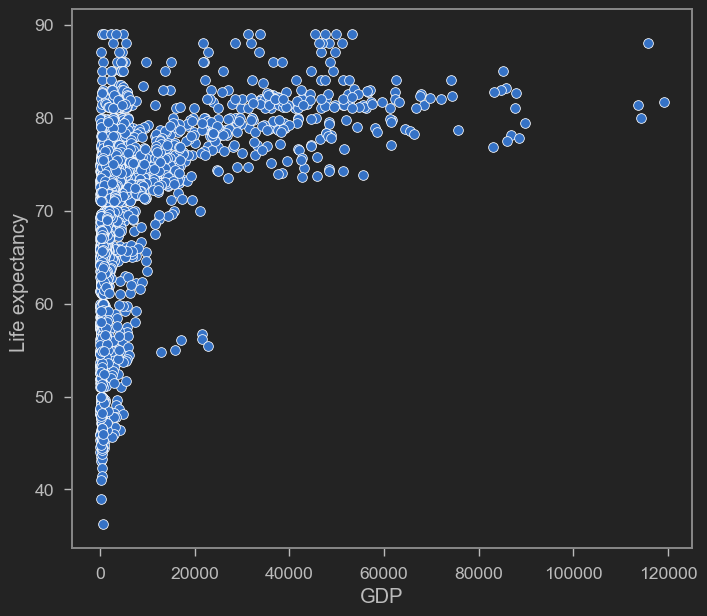

In [11]:
sns.scatterplot(x='GDP',y='Life expectancy ',data=life_expectancy_df)
plt.show()

<AxesSubplot: xlabel='Income composition of resources', ylabel='Life expectancy '>

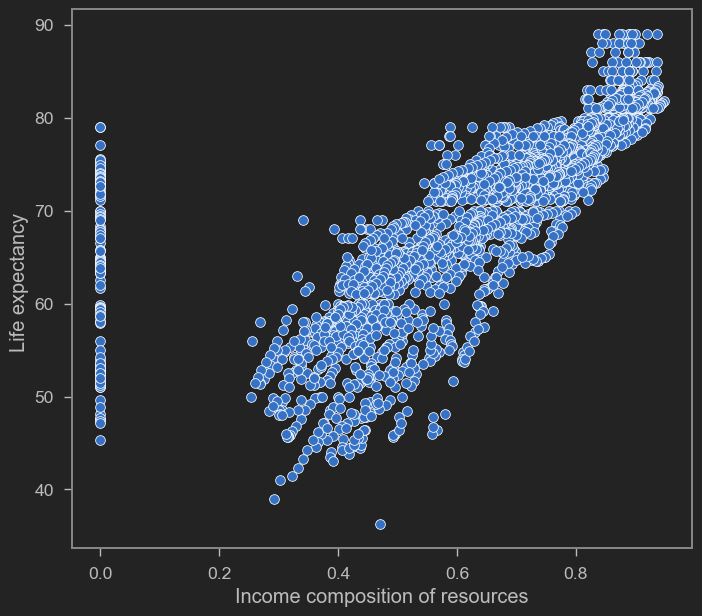

In [12]:
sns.scatterplot(x='Income composition of resources',y='Life expectancy ',data=life_expectancy_df)

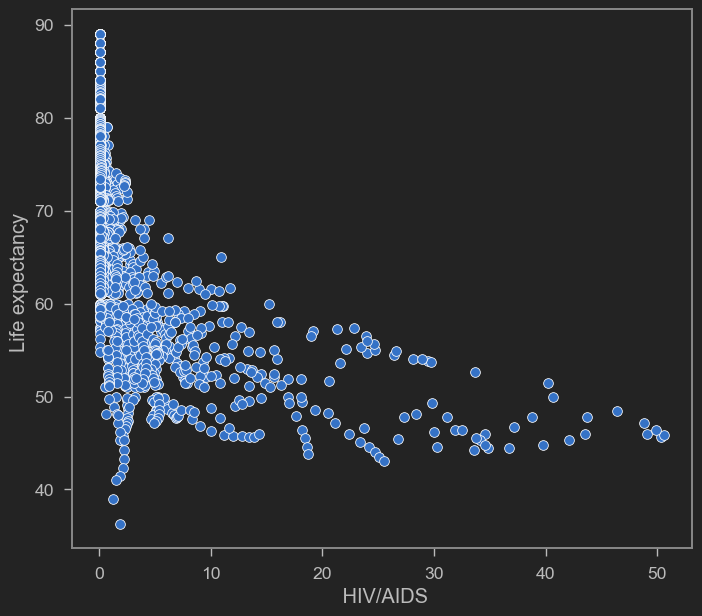

In [15]:
sns.scatterplot(x=' HIV/AIDS',y='Life expectancy ',data=life_expectancy_df)
plt.show()

In [13]:
life_expectancy_df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

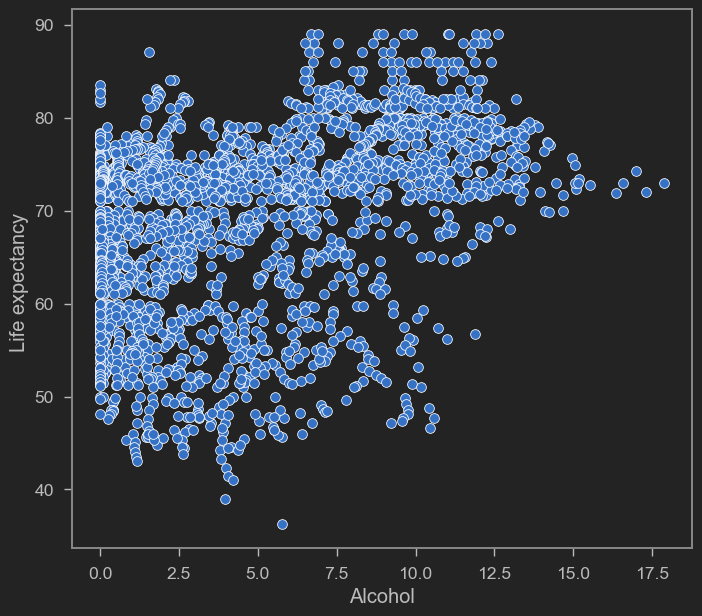

In [16]:
sns.scatterplot(x='Alcohol',y='Life expectancy ',data=life_expectancy_df)
plt.show()

 <font color=#FF0000>Surprisingly we dont see a signicant correlation between alcohol and life expectancy!</font>

In [19]:
life_expectancy_df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Check life expectancy in status category

In [51]:
# Checking the unique value in column country (status) to consider it as a categorical variable
life_expectancy_df['Status'].nunique()

2

In [52]:
# Perform one-hot encoding
life_expectancy_df = pd.get_dummies(life_expectancy_df,columns=['Status'])

In [53]:
life_expectancy_df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


*We see status_developed and Status_developing columns.*

In [54]:
# Check the number of null values for each column
life_expectancy_df.isnull().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Status_Developed                     0
Status_Developing                    0
dtype: int64

In [55]:
#Since most of them are continuous values we fill them with their mean
life_expectancy_df = life_expectancy_df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [56]:
life_expectancy_df.isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Status_Developed                   0
Status_Developing                  0
dtype: int64

In [27]:
life_expectancy_df['Life expectancy '].max()

89.0

### TASK 4: 
#### *CREATE TRAINING AND TESTING DATASET*

In [108]:
# Create train and test data
x= life_expectancy_df.drop(columns=['Life expectancy '])
y= life_expectancy_df[['Life expectancy ']]

In [109]:
x

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


In [110]:
y

,Life expectancy
0,65.0
1,59.9
2,59.9
3,59.5
4,59.2
...,...
2933,44.3
2934,44.5
2935,44.8
2936,45.3


In [111]:
y.shape

(2938, 1)

In [112]:
# Covert the data type to float32
X= np.array(x).astype('float32')
y= np.array(y).astype('float32')

In [113]:
y

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]], dtype=float32)

In [114]:
# Split data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [115]:
y_train

array([[68.7],
       [73.1],
       [64. ],
       ...,
       [55.4],
       [77.4],
       [74.2]], dtype=float32)

In [126]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

### TASK 6: 
#### *TRAINING A LINEAR REGRESSION MODEL IN SCIKIT-LEARN*

In [131]:
# Using linear model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

model= LinearRegression(fit_intercept = True)
model.fit(X_train,y_train)

LinearRegression()

In [132]:
model.score(X_test,y_test)

0.8105269924668241

In [133]:
model.fit(X_train_scaled,y_train_scaled)
model.score(X_test_scaled,y_test_scaled)

0.8105269371178649

In [134]:
print('Linear Model Coefficient (m): ', model.coef_)
print('Linear Model Coefficient (b): ', model.intercept_)

Linear Model Coefficient (m):  [[-3.7998264e-03 -2.5513065e-01  1.3455225e+00  2.0371918e-02
   4.3871962e-03 -3.5584182e-02 -1.7542876e-02  9.1289520e-02
  -1.3599749e+00  6.7177355e-02  1.6050421e-02  9.9667549e-02
  -2.4949189e-01  5.8287941e-02  1.2348043e-03 -4.4275913e-02
   5.3268000e-03  1.1996192e-01  2.5013870e-01  2.5437729e-02
  -2.5437580e-02]]
Linear Model Coefficient (b):  [-4.8899935e-08]


### TASK 7:
#### *EVALUATE TRAINED MODEL PERFORMANCE*

In [135]:
# Make prediction
y_predicted = model.predict(X_test)

In [136]:
y_predicted

array([[ 0.99825317],
       [ 0.9599091 ],
       [-0.8451206 ],
       [ 0.20849514],
       [ 0.4245545 ],
       [ 0.17213552],
       [ 0.8502971 ],
       [-0.6691136 ],
       [ 0.15533347],
       [ 0.51570123],
       [ 0.5735939 ],
       [ 0.15667658],
       [ 1.0784116 ],
       [ 0.05175755],
       [ 1.2247714 ],
       [-1.8159839 ],
       [ 0.58333296],
       [ 1.2339863 ],
       [ 0.66521055],
       [ 0.84851444],
       [-0.82609254],
       [ 0.5145312 ],
       [ 1.4218627 ],
       [ 0.52182794],
       [-1.4836944 ],
       [ 1.6610552 ],
       [ 0.04411381],
       [-0.4363329 ],
       [-0.8521659 ],
       [ 0.80276114],
       [-0.34742048],
       [-0.62734765],
       [ 0.52894086],
       [ 0.06456292],
       [ 0.83226645],
       [ 0.66784054],
       [-1.173889  ],
       [ 1.040824  ],
       [ 1.4413668 ],
       [-0.19553703],
       [ 1.1843584 ],
       [ 0.6906779 ],
       [-2.170446  ],
       [-0.06545287],
       [ 0.29704076],
       [ 0

Text(0.5, 1.0, 'Non scaled values')

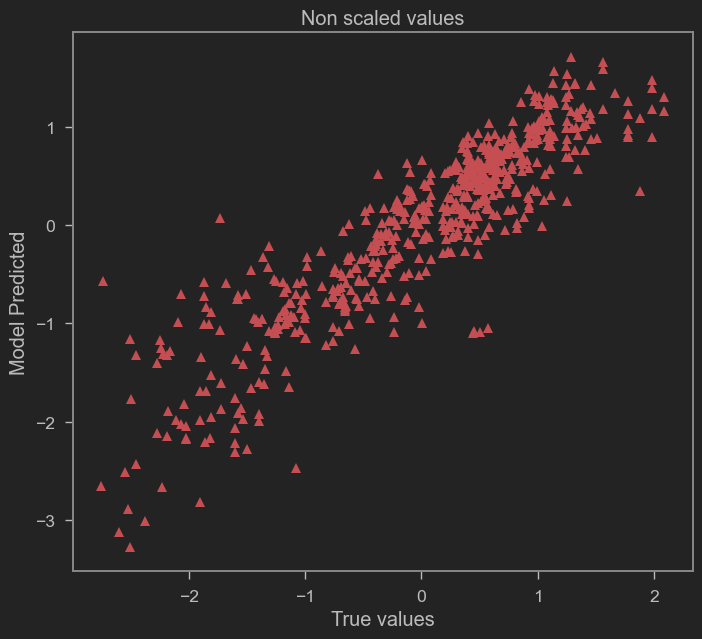

In [139]:
# Plot the results
plt.plot(y_test,y_predicted,"^",color='r')
plt.xlabel("True values")
plt.ylabel("Model Predicted")
plt.title("Non scaled values")

In [140]:
y_predicted_scaled = model.predict(X_test_scaled)

Text(0.5, 1.0, 'Non scaled values')

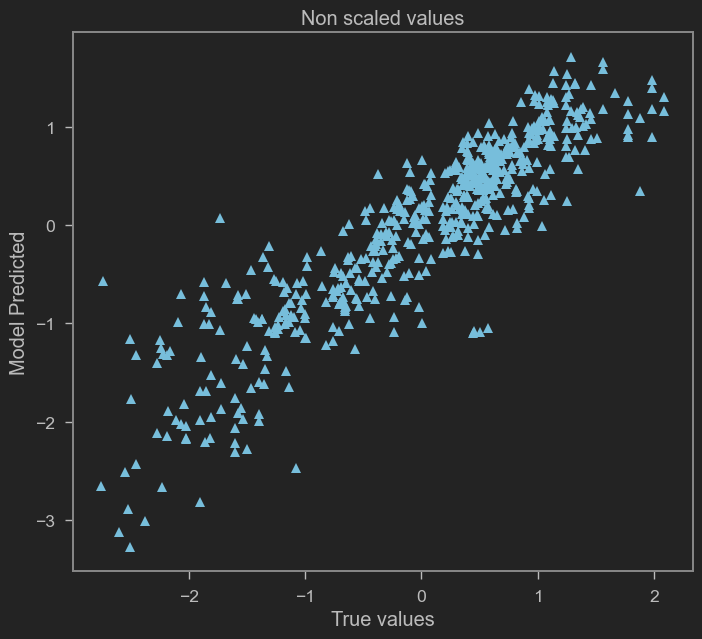

In [141]:
# Plot the results
plt.plot(y_test_scaled,y_predicted_scaled,"^",color='c')
plt.xlabel("True values")
plt.ylabel("Model Predicted")
plt.title("Non scaled values")

In [142]:
# Plot the KPIs
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [151]:
k=X_test.shape[1]
n = len(X_test)
MSE = mean_squared_error(y_test,y_predicted)
RMSE = float(format(np.sqrt(mean_squared_error(y_test,y_predicted)),'.3f'))
MAE = mean_absolute_error(y_test,y_predicted)
r2 = r2_score(y_test,y_predicted)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [152]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.443 
MSE = 0.19582944 
MAE = 0.32086316 
R2 = 0.8105269353188975 
Adjusted R2 = 0.8034970159579379


<div class="alert alert-success">The above Linear regression model could predict the values with 81% accuracy.</div>

In [153]:
import numpy as np

X = [1,2,3]
X = np.array(X)

print(X.shape)

(3,)
